# Activity: Hypothesis testing with Python

By **Saddam Umer**

## **Introduction**


As you've been learning, analysis of variance (commonly called ANOVA) is a group of statistical techniques that test the difference of means among three or more groups. It's a powerful tool for determining whether population means are different across groups and for answering a wide range of business questions.

In this activity, you are a data professional working with historical marketing promotion data. You will use the data to run a one-way ANOVA and a post hoc ANOVA test. Then, you will communicate your results to stakeholders. These experiences will help you make more confident recommendations in a professional setting. 

In your dataset, each row corresponds to an independent marketing promotion, where your business uses TV, social media, radio, and influencer promotions to increase sales. You have previously provided insights about how different promotion types affect sales; now stakeholders want to know if sales are significantly different among various TV and influencer promotion types.

To address this request, a one-way ANOVA test will enable you to determine if there is a statistically significant difference in sales among groups. This includes:
* Using plots and descriptive statistics to select a categorical independent variable
* Creating and fitting a linear regression model with the selected categorical independent variable
* Checking model assumptions
* Performing and interpreting a one-way ANOVA test
* Comparing pairs of groups using an ANOVA post hoc test
* Interpreting model outputs and communicating the results to nontechnical stakeholders

## **Step 1: Imports** 


Import pandas, pyplot from matplotlib, seaborn, api from statsmodels, ols from statsmodels.formula.api, and pairwise_tukeyhsd from statsmodels.stats.multicomp.

In [31]:
# Import libraries and packages.

### YOUR CODE HERE ### 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

`Pandas` was used to load the dataset `marketing_sales_data.csv` as `data`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [32]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ### 
data = pd.read_csv('Task-4-Dataset-marketing_sales_data-Course-5.csv')

# Display the first five rows.

### YOUR CODE HERE ### 
data.head(5)


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

**Question:** Why is it useful to perform exploratory data analysis before constructing a linear regression model?

**Answere:** Performing exploratory data analysis (EDA) before constructing a linear regression model is useful because it helps understand the variables in the dataset, including their distributions, ranges, and relationships with the dependent variable. EDA allows you to visualize which features show linear relationships with the target variable and identify any potential issues like incorrect values or missing data. This ensures that the selected variables are appropriate for the model and improves the chances of building a more accurate and reliable regression model.

## **Step 2: Data exploration** 


First, use a boxplot to determine how `Sales` vary based on the `TV` promotion budget category.

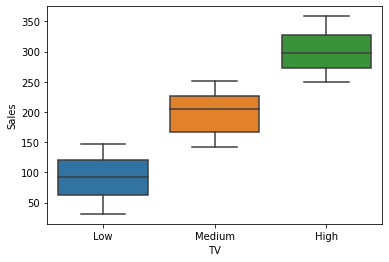

In [33]:
# Create a boxplot with TV and Sales.

### YOUR CODE HERE ### 
sns.boxplot(x='TV',y='Sales',data=data)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a function in the `seaborn` library that creates a boxplot showing the distribution of a variable across multiple groups.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `boxplot()` function from `seaborn`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `TV` as the `x` argument, `Sales` as the `y` argument, and `data` as the `data` argument.

</details>

**Question:** Is there variation in `Sales` based off the `TV` promotion budget?

**Answere:** Yes, there is considerable variation in Sales based on the TV promotion budget. This variation can be further analyzed and tested for statistical significance using a one-way ANOVA to determine whether the differences in Sales across different TV promotion budget groups are meaningful.

Now, use a boxplot to determine how `Sales` vary based on the `Influencer` size category.

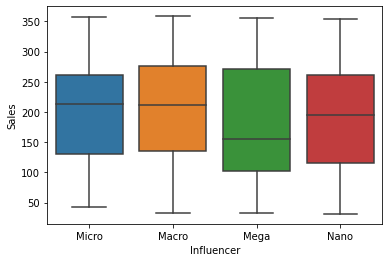

In [34]:
# Create a boxplot with Influencer and Sales.

### YOUR CODE HERE ### 

sns.boxplot(x='Influencer',y='Sales',data=data)

**Question:** Is there variation in `Sales` based off the `Influencer` size?

**Answere:** Yes, there is some variation in Sales across the Influencer size groups, but the differences may not be substantial. Further statistical testing, such as ANOVA, can help determine if this variation is significant.

### Remove missing data

You may recall from prior labs that this dataset contains rows with missing values. To correct this, drop these rows. Then, confirm the data contains no missing values.

In [35]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 
data.dropna( axis=0, inplace=True)

# Confirm the data contains no missing values.

### YOUR CODE HERE ### 
data.isna().sum()


TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

There is a `pandas` function that removes missing values.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The `dropna()` function removes missing values from an object (e.g., DataFrame).

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Verify the data is updated properly after the rows containing missing data are dropped.

</details>

## **Step 3: Model building** 


Fit a linear regression model that predicts `Sales` using one of the independent categorical variables in `data`. Refer to your previous code for defining and fitting a linear regression model.

In [36]:
# Define the OLS formula.

### YOUR CODE HERE ### 
formula = 'Sales ~ C(TV)'

# Create an OLS model.

### YOUR CODE HERE ### 
OLS = ols(formula=formula, data=data[['TV','Sales']])


# Fit the model.

### YOUR CODE HERE ### 
model = OLS.fit()

# Save the results summary.

### YOUR CODE HERE ### 
result_summary = model.summary()

# Display the model results.

### YOUR CODE HERE ### 
result_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          8.81e-256
Time:                        13:48:52   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to code you've written to fit linear regression models.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `ols()` function from `statsmodels.formula.api`, which creates a model from a formula and DataFrame, to create an OLS model.

</details>


<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use `C()` around the variable name in the ols formula to indicate a variable is categorical.
    
Be sure the variable string names exactly match the column names in `data`.

</details>

**Question:** Which categorical variable did you choose for the model? Why?

**Answere:** TV was selected as the categorical variable for the model because the analysis showed a strong relationship between TV promotion budget and average Sales. Influencer was not included as it did not demonstrate a significant relationship with Sales.

### Check model assumptions

Now, check the four linear regression assumptions are upheld for your model.

**Question:** Is the linearity assumption met?

**Answere:** The linearity assumption is not applicable here because the model does not include continuous independent variables. Regarding the independent observation assumption, it is met since each marketing promotion in the dataset is independent from the others.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

Next, verify that the normality assumption is upheld for the model.

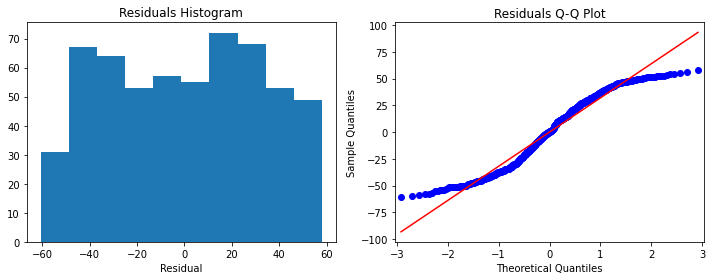

In [37]:
# Calculate the residuals.

### YOUR CODE HERE ### 
residual = model.resid

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 

fig, ( ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.hist(residual)
ax1.set_xlabel('Residual')
ax1.set_title('Residuals Histogram')

# Create a QQ plot of the residuals.

### YOUR CODE HERE ### 
sm.qqplot(residual, line='s', ax= ax2)
ax2.set_title('Residuals Q-Q Plot')

plt.tight_layout()
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the residuals from the fit model object.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.resid` to get the residuals from a fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

For the histogram, pass the residuals as the first argument in the `seaborn` `histplot()` function.
    
For the QQ-plot, pass the residuals as the first argument in the `statsmodels` `qqplot()` function.

</details>

**Question:** Is the normality assumption met?

**Answere:** There is concern that the normality assumption may not be fully met since the Q-Q plot forms an 'S' shape, indicating deviation from the expected diagonal line. However, for the purpose of the lab, we will proceed with the assumption that the normality assumption is sufficiently met.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

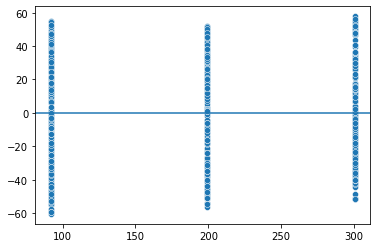

In [38]:
# Create a scatter plot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 
y_pred = model.predict(data[['TV']])

sns.scatterplot(x=y_pred,y=residual)

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 
plt.axhline(0)
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Access the fitted values from the model object fit earlier.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use `model.fittedvalues` to get the fitted values from the fit model called `model`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>


Call the `scatterplot()` function from the `seaborn` library and pass in the fitted values and residuals.
    
Add a line to a figure using the `axline()` function.

</details>

**Question:** Is the constant variance (homoscedasticity) assumption met?

**Answere:** The constant variance (homoscedasticity) assumption is met, as the variance in the fitted values is similarly distributed, indicating no clear pattern of heteroscedasticity.

## **Step 4: Results and evaluation** 

First, display the OLS regression results.

In [39]:
# Display the model results summary.

### YOUR CODE HERE ### 
result_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          8.81e-256
Time:                        13:48:52   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

**Answere:** The model, using TV as the independent variable, has an R-squared of 0.874, meaning it explains 87.4% of the variation in Sales. This makes it an effective predictor of Sales.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

**Answere:** The default TV category is High. Sales for Medium and Low TV categories are lower on average than for the High category. For example, a Low TV promotion predicts Sales to be 208.813 million dollars lower than a High TV promotion. All coefficients are statistically significant (p-value = 0.000), and the 95% confidence intervals should be reported for accuracy.

**Question:** Do you think your model could be improved? Why or why not? How?

**Answere:** The model could be enhanced by including more detailed TV promotion categories or actual budgets. Adding other factors like campaign location or timing may further improve model performance.

### Perform a one-way ANOVA test

With the model fit, run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups. 

In [40]:
# Create an one-way ANOVA table for the fit model.

### YOUR CODE HERE ### 
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.052692e+06,2.026346e+06,1971.455737,8.805550e-256
Residual,566.0,5.817589e+05,1.027843e+03,NaN,NaN


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a one-way ANOVA test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

There is a function in `statsmodels.api` (i.e. `sm`) that peforms an ANOVA test for a fit linear model.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `anova_lm()` function from `sm.stats`. Specify the type of ANOVA test (for example, one-way or two-way), using the `typ` parameter.
   

</details>

**Question:** What are the null and alternative hypotheses for the ANOVA test?

**Answere:** 
- Null Hypothesis (H₀): There is no difference in Sales based on the TV promotion budget.
- Alternative Hypothesis (H₁): There is a difference in Sales based on the TV promotion budget.

**Question:** What is your conclusion from the one-way ANOVA test?

**Answere:** The F-test statistic is 1971.46, and the p-value is extremely small (8.81 × 10⁻²⁵⁶). Since the p-value is less than 0.05, we reject the null hypothesis, meaning there is a significant difference in Sales based on the TV promotion budget.

**Question:** What did the ANOVA test tell you?

**Answere:** The ANOVA test shows that the differences in Sales across different TV promotion budget groups are statistically significant, supporting the alternative hypothesis.

### Perform an ANOVA post hoc test

If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test. 

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [41]:
# Perform the Tukey's HSD post hoc test.

### YOUR CODE HERE ### 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

result_hsd = pairwise_tukeyhsd(endog=data['Sales'],groups=data['TV'],alpha=0.05)

result_hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.001,-216.637,-200.9896,True
High,Medium,-101.5061,0.001,-109.3204,-93.6918,True
Low,Medium,107.3072,0.001,99.7063,114.908,True


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about how to perform a Tukey's HSD post hoc test.

</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pairwise_tukeyhsd()` function from `statsmodels.stats.multicomp`.

</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

The `endog` argument in `pairwise_tukeyhsd` indicates which variable is being compared across groups (i.e., `Sales`). The `groups` argument in `pairwise_tukeyhsd` tells the function which variable holds the group you’re interested in reviewing.

</details>

**Question:** What is your interpretation of the Tukey HSD test?

**Answere:** The first row, comparing the High and Low TV groups, shows that there is a significant difference in Sales between these two groups. Similarly, the pairwise comparisons between High and Medium, and Low and Medium TV groups, also show significant differences. In all cases, the null hypothesis, which suggests no difference between the groups, can be rejected.

**Question:** What did the post hoc tell you?**

**Answere:** The post hoc test, specifically the Tukey HSD, identifies which TV groups differ from one another. This gives more granular insights than the one-way ANOVA, which only indicates that at least one group is different. The Tukey HSD test controls for the risk of false positives from performing multiple comparisons. The results indicate that Sales differs significantly between all pairs of TV promotion budget groups.

## **Considerations**

**What are some key takeaways that you learned during this lab?**

- Box plots are effective for visualizing the distribution of a variable across different groups.
- One-way ANOVA is useful for identifying significant differences in means among three or more groups.
- ANOVA post hoc tests, like Tukey's HSD, provide detailed insights into pairwise differences between groups.

**What summary would you provide to stakeholders? Consider the statistical significance of key relationships and differences in distribution.**

High TV promotion budgets significantly drive higher sales compared to both medium and low budgets, while medium budgets also outperform low budgets. Specifically:

- The estimated difference in mean sales between High and Low TV promotions is \\$208.81 million, with a 95% confidence interval ranging from \\$200.99 to \\$216.64 million.
- The estimated difference between High and Medium TV promotions is \\$101.51 million, with a confidence interval of \\$93.69 to \\$109.32 million.
- The estimated difference between Medium and Low TV promotions is \\$107.31 million, with a confidence interval of \\$99.71 to \\$114.91 million.
- The linear regression model, which estimates sales based on TV budgets, yielded an R-squared value of 0.871, indicating strong predictive accuracy. There is a statistically significant relationship between the TV promotion budget and sales.

#### **Reference**
[Saragih, H.S. *Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.